In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from astropy import units as u
from astropy.table import Table, Column
from astropy.table import QTable
from astroquery.simbad import Simbad
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import gala.coordinates as gc
import pandas as pd

#Finding the row of the catalogue that corresponds to a certain HD #
def HDtoRow(HDnum):          
    x = np.where(hd == HDnum)
    row = int(x[0])
    return row

#Finding the distance, proper motion in RA and Dec, radial velocity, and position in RA and Dec from the star's HD #
def HDtoInfo(HDnum):                           
    distance = dist[HDtoRow(HDnum)]            
    properRA = propRA[HDtoRow(HDnum)]
    properDec = propDec[HDtoRow(HDnum)]
    radialVel = radVel[HDtoRow(HDnum)]
    RA = RA_rad[HDtoRow(HDnum)]
    Dec = Dec_rad[HDtoRow(HDnum)]
    info = [distance, properRA, properDec, radialVel, RA, Dec]
    return info

#Finding the absolute magnitude of a star from its HD
def HDtoAbsMag(HDnum):
    abs_mag = absmag[HDtoRow(HDnum)]
    return abs_mag

#Finding the B-V color index from a star's HD
def HDtoBV(HDnum):
    bv = color_index[HDtoRow(HDnum)]
    return bv

#Finding the space velocity of a star. The argument infoArray is the array of information given by the HDtoInfo function
def dataTospaceVel(infoArray):
    distance = infoArray[0]
    properMotion_RA = infoArray[1]
    properMotion_Dec = infoArray[2]
    radVel = infoArray[3]
    RA = infoArray[4]
    Dec = infoArray[5]
    # Original units of proper motion in miliseconds of arc / year. Need to change this to seconds of arc / year
    propMotionRA = properMotion_RA / 1000
    propMotionDec = properMotion_Dec / 1000
    # Convert proper motions to transverse velocities in km/s
    velTrans_RA = propMotionRA * distance * 4.740
    velTrans_Dec = propMotionDec * distance * 4.740
    # Converting velocities to new coordinate system to get dx, dy, dz in km/s
    dx = (radVel * np.cos(Dec) * np.cos(RA)) - (velTrans_RA * np.sin(RA)) - (velTrans_Dec * np.sin(Dec) * np.cos(RA))
    dy = (radVel * np.cos(Dec) * np.sin(RA)) + (velTrans_RA * np.cos(RA)) - (velTrans_Dec * np.sin(Dec) * np.sin(RA))
    dz = (radVel * np.sin(Dec)) + (velTrans_Dec * np.cos(Dec))
    # Converting velocities from km/s to parsec/year
    #dx = dx * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dy = dy * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dz = dz * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    spaceVel = [dx, dy, dz]
    return spaceVel

#Finding a star's cartesian coordinates from its RA and Dec
def radec_to_cartesian(ra_list, dec_list, vel_mag):
    #Read in individual componenets of RA and Dec
    ra_hour = ra_list[0]
    ra_min = ra_list[1]
    ra_sec = ra_list[2]
    dec_deg = dec_list[0]
    dec_arcmin = dec_list[1]
    dec_arcsec = dec_list[2]
    #Convert to degrees
    ra_deg = ra_hour * 15
    ra_arcmin = ra_min * 15
    ra_arcsec = ra_sec * 15
    ra_totdeg = ra_deg + (ra_arcmin/60) + (ra_arcsec/3600)
    dec_totdeg = dec_deg + (dec_arcmin/60) + (dec_arcsec/3600)
    #Convert to radians
    ra_rad = ra_totdeg * (np.pi/180)
    dec_rad = dec_totdeg * (np.pi/180)
    #Find cartesian velocities
    vx = vel_mag * np.cos(dec_rad) * np.cos(ra_rad)
    vy = vel_mag * np.cos(dec_rad) * np.sin(ra_rad)
    vz = vel_mag * np.sin(dec_rad)
    vel_vector = [vx, vy, vz]
    return vel_vector


Star 1: Lambda Ursa Majoris
[-2.3475979602671844, 38.864464643846226, 6.0158794441732875] 

Star 2: R Lyrae
[-2.2261871036624736, 45.17286102812994, 5.711955084322469] 

Star 3: 95 Aquarii
[-7.246084337302554, 18.103551842470473, -1.253726878627938] 

Star 4: 47 Arietis
[-5.9516613501603635, 45.91834674064229, 5.228910029405311] 

Star 5: Kappa Reticuli
[-6.9698543814287, 55.40789219849239, 6.760093054609534] 

Star 6: 20 Psc
[-4.526303458449437, 44.68559218038144, 2.8653912567313133] 



<IPython.core.display.Javascript object>


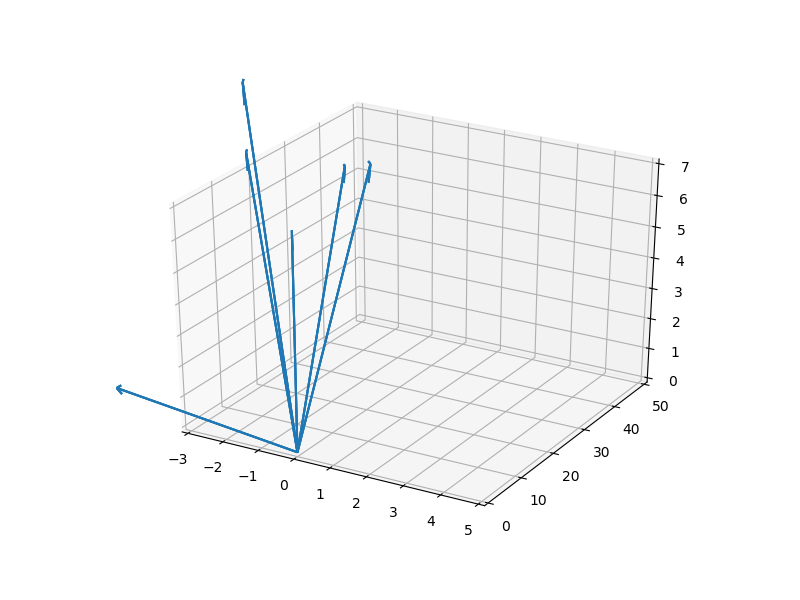

In [2]:
%matplotlib notebook

#Open catalogue data
starInfo = open("hygdata_v3.csv")

#Read in HD number, distance, proper motions, radial velocity, right ascension and declination (in radians)
dist, propRA, propDec, radVel, RA_rad, Dec_rad, xCat, yCat, zCat, vxCat, vyCat, vzCat, absmag = np.loadtxt("hygdata_v3.csv", usecols=(9, 10, 11, 12, 23, 24, 17, 18, 19, 20, 21, 22, 14), delimiter=",", skiprows = 2, unpack=True)
hd, color_index = np.genfromtxt("hygdata_v3.csv", usecols=(2, 16), delimiter=",", skip_header = 2, unpack = True)

# Testing stars in Hyades
print("Star 1: Lambda Ursa Majoris")
print(dataTospaceVel(HDtoInfo(89021)), "\n")
print("Star 2: R Lyrae")
print(dataTospaceVel(HDtoInfo(175865)), "\n")
print("Star 3: 95 Aquarii")
print(dataTospaceVel(HDtoInfo(219832)), "\n")
print("Star 4: 47 Arietis")
print(dataTospaceVel(HDtoInfo(18404)), "\n")
print("Star 5: Kappa Reticuli")
print(dataTospaceVel(HDtoInfo(22001)), "\n")
print("Star 6: 20 Psc")
print(dataTospaceVel(HDtoInfo(223252)), "\n")

test1 = dataTospaceVel(HDtoInfo(89021))
test2 = dataTospaceVel(HDtoInfo(175865))
test3 = dataTospaceVel(HDtoInfo(219832))
test4 = dataTospaceVel(HDtoInfo(18404))
test5 = dataTospaceVel(HDtoInfo(22001))
test6 = dataTospaceVel(HDtoInfo(223252))

origin = [0, 0, 0]
starList = [test1, test2, test3, test4, test5, test6]

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim([-3, 5])
ax1.set_ylim([0, 50])
ax1.set_zlim([0, 7])

for i in range(len(starList)):
    X, Y, Z = zip(origin, origin, origin)
    U, V, W = zip(starList[i], starList[i], starList[i])
    ax1.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.03)

plt.show()

In [4]:
#Reading in Gaia info
sir_gaia = pd.read_csv('Sirius Gaia Info.csv')
sir_gaia_tab = Table.from_pandas(sir_gaia)  #Make table from pandas df
sir_gaia_qtab = QTable(sir_gaia_tab, units=
                      {'ra': u.degree, 'dec': u.degree, 'parallax': u.marcsec, 'target_radial_velocity': u.km/u.s,
                      'target_pm_ra': u.marcsec/u.yr, 'target_pm_dec': u.marcsec/u.yr, 'target_parallax': u.marcsec})   #Make QTable and give units for columns

plx_to_dist1 = Column(name='dist', data=sir_gaia_qtab['parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from parallax data
sir_gaia_qtab.add_column(plx_to_dist1, index=5)
plx_to_dist2 = Column(name='target_dist', data=sir_gaia_qtab['target_parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from target parallax data
sir_gaia_qtab.add_column(plx_to_dist2, index=6)

sir = pd.read_csv('Sirius Stars.csv')
sir_hd = sir[['hd']]

hyg_db = pd.read_csv('hygdata_v3.csv')
hyg_db = hyg_db[hyg_db['hd'].notna()]  #Drop stars that don't have HD numbers recorded

sir_info = hyg_db.loc[hyg_db['hd'].isin(sir_hd['hd'])]  #Get info for Hyades stars
sir_tab = Table.from_pandas(sir_info)
sir_qtab = QTable(sir_tab, units={'vx': u.pc/u.yr, 'vy': u.pc/u.yr, 'vz': u.pc/u.yr})
sir_qtab['vx'] = sir_qtab['vx'].to(u.km/u.s)   #Converting velocities from pc/yr to km/s
sir_qtab['vy'] = sir_qtab['vy'].to(u.km/u.s)
sir_qtab['vz'] = sir_qtab['vz'].to(u.km/u.s)

sir_pos = sir_qtab['ra', 'dec']
sir_pos = sir_pos.to_pandas()

#Open Sirius stars data file
sirius_Stars = open("Sirius Stars.csv")

#Read in star name and HD number
s_starName, s_starHD = np.genfromtxt("Sirius Stars.csv", usecols=(0, 1), delimiter=",", skip_header = 1, unpack = True)

sirius_absmag = []
sirius_bv = []

x = np.where(hd == s_starHD[0])

for i in range(0, len(s_starHD)):
    starHD1 = s_starHD[i]
    if np.isnan(starHD1) == True:
        continue
    starAbsMag = HDtoAbsMag(starHD1)
    sirius_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    sirius_bv.append(starBV)

print(sir_gaia_qtab)

source_id         ra         ... target_radial_velocity    target_distance    
                 deg         ...         km / s                               
--------- ------------------ ... ---------------------- ----------------------
 8.55e+17 158.79093400000002 ...    -12.109000000000002  8.109999999999999e-08
 8.56e+17 165.46097419999998 ...                  -13.1               2.71e-06
 7.93e+17        178.4583668 ...                  -11.9  8.290000000000001e-05
 1.58e+18        183.8573483 ...                  -15.3               5.84e-06
 1.57e+18        187.8296796 ...                 -10.45 2.9999999999999997e-05
 1.57e+18        188.9644945 ...                 -8.505               3.64e-08
 1.57e+18        190.4364785 ...                 -9.604               4.59e-08
 1.58e+18 193.50817849999999 ...                  -12.7               1.55e-06
 1.58e+18        195.1831149 ...                   -9.8               9.32e-05
 1.57e+18        198.4051039 ...                 -8.

<IPython.core.display.Javascript object>


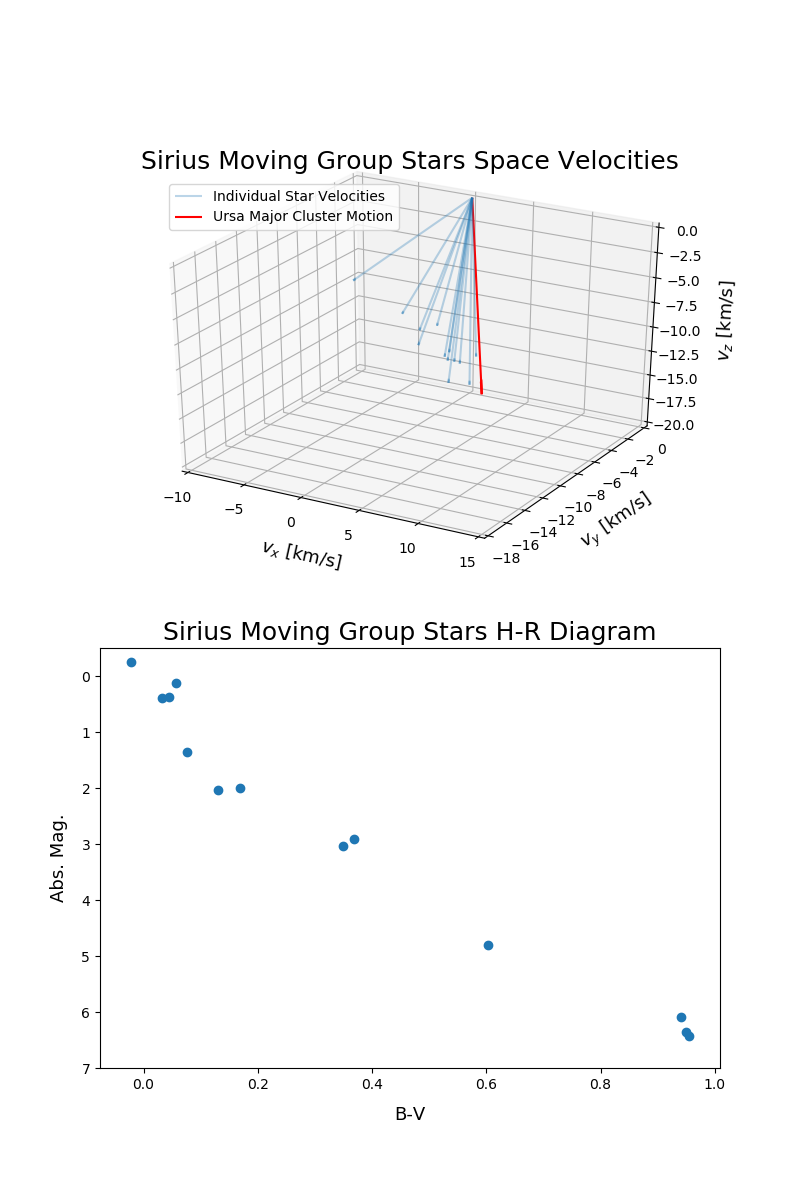

In [8]:
#Getting velocity vector for Sirius star
sirius_vector = radec_to_cartesian([20, 44, 0], [-42.7, 0, 0], 18.4)

fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-10, 15])
ax2.set_ylim([-18, 0])
ax2.set_zlim([-20, 0])
ax2.set_title("Sirius Moving Group Stars Space Velocities", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Sirius group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, sir_qtab['vx'], sir_qtab['vy'], sir_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
#avgX = mean(U_s)
#avgY = mean(V_s)
#avgZ = mean(W_s)
#ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of the star Sirius which is part of the Ursa Major cluster
ax2.quiver(*origin, sirius_vector[0], sirius_vector[1], sirius_vector[2], color='red', arrow_length_ratio=0.07, label="Ursa Major Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center left', bbox_to_anchor=(0.1, 0.85))

ax3 = fig2.add_subplot(212)
ax3.set_ylim([7, -0.5])
ax3.set_title("Sirius Moving Group Stars H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(sirius_bv, sirius_absmag)
plt.show()

In [6]:
sir_pos_comb = sir_pos['ra'].astype(str) + str(' ') + sir_pos['dec'].astype(str)
sir_names = str('hd ') + sir_info['hd'].astype(str)
sir_names.to_csv('Sirius Names.csv')

/Users/eve.charest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


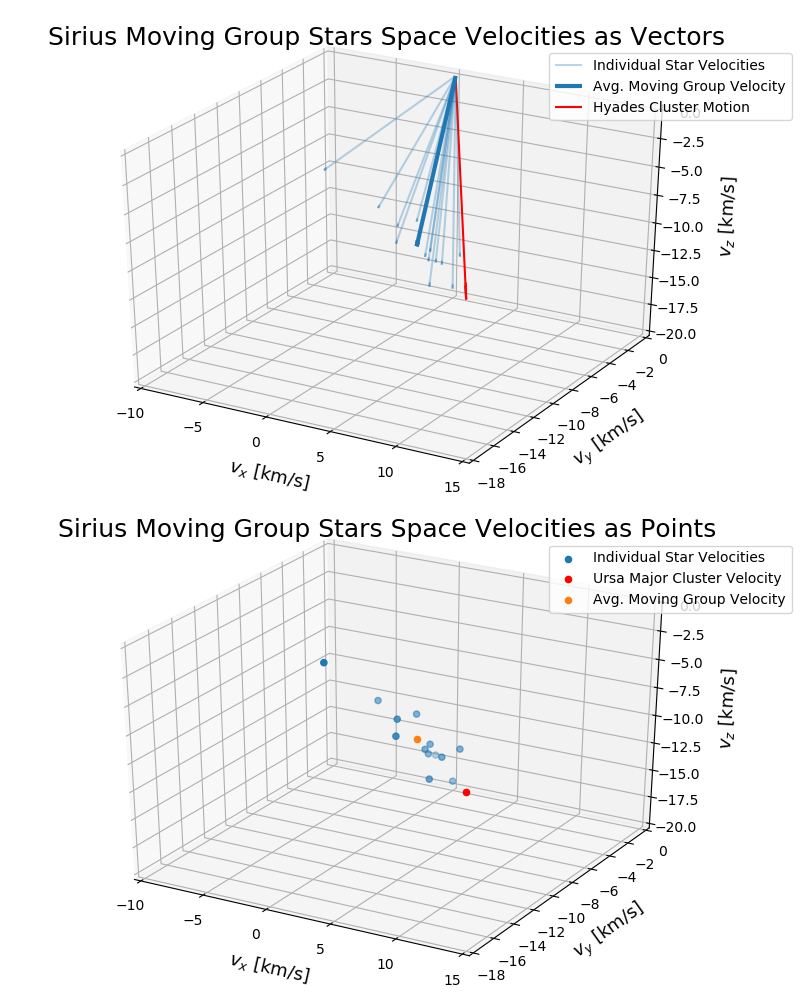

In [53]:
#Getting velocity vector for Sirius star
sirius_vector = radec_to_cartesian([20, 44, 0], [-42.7, 0, 0], 18.4)

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,10))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-10, 15])
ax2.set_ylim([-18, 0])
ax2.set_zlim([-20, 0])
ax2.set_title("Sirius Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, sir_qtab['vx'], sir_qtab['vy'], sir_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
avgX = mean(U_s)
avgY = mean(V_s)
avgZ = mean(W_s)
ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
ax2.quiver(*origin, sirius_vector[0], sirius_vector[1], sirius_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212, projection='3d')
ax3.set_title("Sirius Moving Group Stars Space Velocities as Points", fontsize = 18)
ax3.scatter(sir_qtab['vx'], sir_qtab['vy'], sir_qtab['vz'], label="Individual Star Velocities")
ax3.scatter(sirius_vector[0], sirius_vector[1], sirius_vector[2], color='red', label="Ursa Major Cluster Velocity")
ax3.scatter(avgX, avgY, avgZ, label="Avg. Moving Group Velocity")
ax3.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)
ax3.set_xlim([-10, 15])
ax3.set_ylim([-18, 0])
ax3.set_zlim([-20, 0])

ax3.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

plt.tight_layout()

In [57]:
print(sir_gaia_qtab['ra', 'dec', 'dist', 'target_dist'])

        ra             dec            dist           target_dist    
       deg             deg             pc                 pc        
------------------ ----------- ------------------ ------------------
158.79093400000002 57.08280045  26.77777907581574  26.82137234233726
165.46097419999998 56.38257749 25.904668760059906 24.449877750611243
       178.4583668 53.69479733 25.503698036215244 25.503698036215244
       183.8573483 57.03265316  24.79672838512023  24.68526289804986
       187.8296796 55.11884449  25.78343314190115  25.34841394973916
       188.9644945 51.22139031 26.191008602546248 26.253127403801976
       190.4364785 55.72465035 22.722121054376675 22.731664071468348
193.50817849999999 55.95978478 25.310048089091367 25.310048089091367
       195.1831149 56.36635376 25.340300688200553  25.44529262086514
       198.4051039 56.70818415 25.161221305512928 25.188599639803027
200.98237340000003 54.92525908  24.86740422175717 25.380710659898476
201.30730580000002 54.98784534 24.

In [11]:
c = SkyCoord(ra=sir_gaia_qtab['ra'], dec=sir_gaia_qtab['dec'], radial_velocity=sir_gaia_qtab['target_radial_velocity'], 
            distance=sir_gaia_qtab['dist'], pm_ra_cosdec=sir_gaia_qtab['target_pm_ra'], pm_dec=sir_gaia_qtab['target_pm_dec'],
            frame='icrs')
pm = [sir_gaia_qtab['target_pm_ra'], sir_gaia_qtab['target_pm_dec']]
c = c.transform_to(coord.Galactocentric)  #Transform from spherical coordinates (RA, Dec, PM) to galactocentric
print(c)

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8136.64933171,  7.74632243, 41.81570782),
     (-8134.7394188 ,  7.65287721, 42.00172713),
     (-8131.38667046,  7.71327897, 43.21280086),
     (-8130.45275239,  9.29184841, 42.16912025),
     (-8129.59281852,  9.47536403, 43.53646512),
     (-8128.66931957,  8.38245139, 44.69283675),
     (-8128.29165597,  8.83836013, 40.75638717),
     (-8128.41755791, 10.33173571, 42.98842409),
     (-8128.17078699, 10.7021626 , 42.91756156),
     (-8127.56559878, 11.17505335, 42.63877684),
     (-8126.56266346, 10.88580784, 42.68207784),
     (-8126.48579753, 10.88402157, 42.52308318),
     (-8126.55350589, 10.8671245 , 42.64628586)]
 (v_x, v_y, v_z) in km / s
    [(26.36856399, 248.36545484,  0.73717036),
     (27.42147203, 248.51652532, -0.53484591),
     (28.26908611, 248.7

<IPython.core.display.Javascript object>


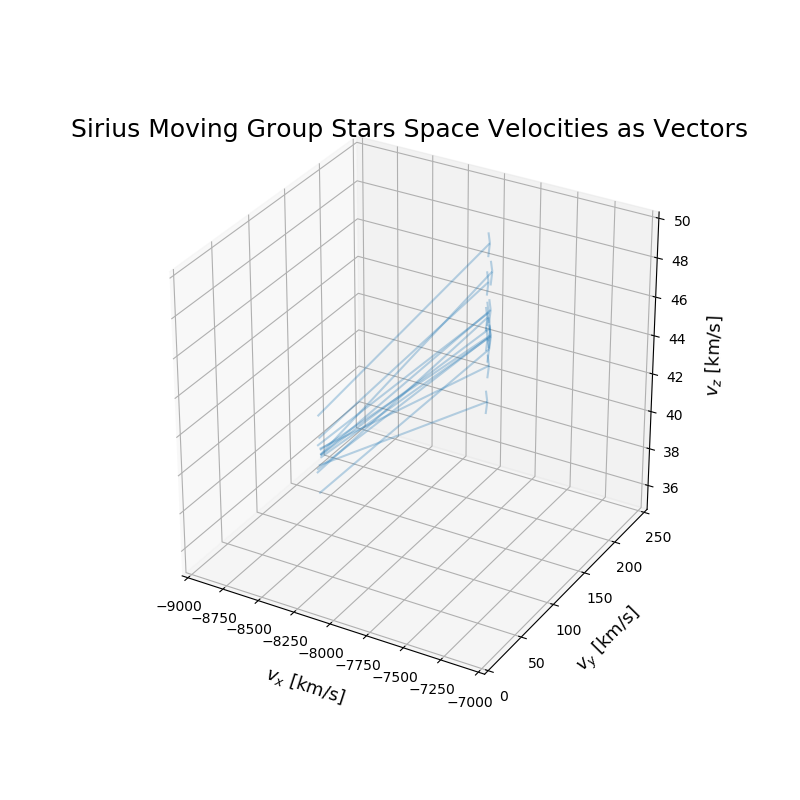

In [12]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlim([-9000, -7000])
ax2.set_ylim([0, 250])
ax2.set_zlim([35, 50])
ax2.set_title("Sirius Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(c.x, c.y, c.z, c.v_x, c.v_y, c.v_z, arrow_length_ratio=0.01, label="Individual Star Velocities", alpha = 0.3);

In [59]:
print(max(c.v_z))
print(min(c.v_z),"\n")
print(max(c.v_y))
print(min(c.v_y),"\n")
print(max(c.v_x))
print(min(c.v_x),"\n")

2.2131516462301697 km / s
-4.147189920687305 km / s 

249.8561676614457 km / s
245.7355096468109 km / s 

28.447216896964935 km / s
25.915036253505548 km / s 



<IPython.core.display.Javascript object>


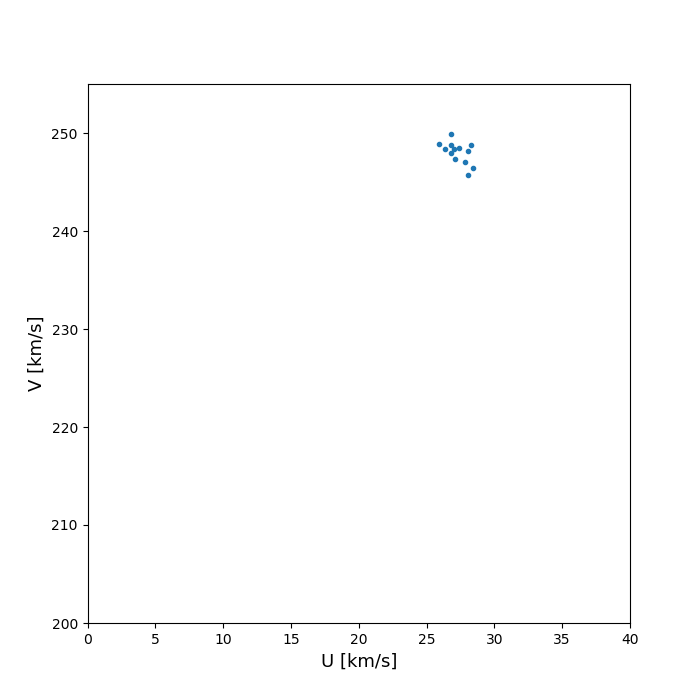

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(c.v_x, c.v_y, marker='.')
ax.set_xlim([0, 40])
ax.set_ylim([200, 255])
ax.set_xlabel("U [km/s]", fontsize=13)
ax.set_ylabel("V [km/s]", fontsize=13);